## Mini Project III

***Task I***:
* create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
    * based on demographics (only on the information from twm_customer)
    * based on their banking behavior. 
        do they have savings account? How much do they save?
        do they have credit account? How much do they live in debt?
        are they making lot of small transactions or few huge ones?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA

### Demographics Cluster

In [5]:
df_customers = pd.read_csv("C:\\Users\\bevli\\Downloads\\mini-project-III\\twm_customer.csv", sep = ';')
df_customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [6]:
df_customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [8]:
#check for null values
df_customers.isna().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [11]:
#Convert marital status to categorical variable
df_customers['marital_status']=df_customers['marital_status'].astype('category')
df_customers

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [17]:
#columns for creating dummy variable
encode = pd.get_dummies(df_customers[['income','age','years_with_bank','nbr_children','gender','marital_status']])
encode

income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender_F            uint8
gender_M            uint8
marital_status_1    uint8
marital_status_2    uint8
marital_status_3    uint8
marital_status_4    uint8
dtype: object

In [22]:
from sklearn.preprocessing import MinMaxScaler

#perform scaling on datafram
encode_scaled = MinMaxScaler().fit_transform(encode)
encode_scaled = pd.DataFrame(encode_scaled, columns = encode.columns)
encode_scaled

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.181399,0.434211,0.555556,0.2,0.0,1.0,0.0,1.0,0.0,0.0
1,0.045818,0.763158,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.128665,0.328947,0.888889,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.330667,0.539474,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.309066,0.605263,1.000000,0.4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.0,0.0,0.0,0.0,0.0,1.0
743,0.183043,0.565789,0.666667,0.2,0.0,1.0,0.0,1.0,0.0,0.0
744,0.425231,0.486842,0.000000,0.4,0.0,1.0,0.0,1.0,0.0,0.0
745,0.104747,0.315789,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\bevli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


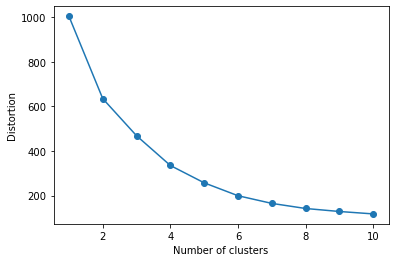

In [30]:
plot_distortion(encode_scaled)

In [42]:
#number of clusters to be taken as 4

encode_scaled['clusters']= KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0).fit_predict(encode_scaled)

encode_scaled

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,clusters
0,0.181399,0.434211,0.555556,0.2,0.0,1.0,0.0,1.0,0.0,0.0,2
1,0.045818,0.763158,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
2,0.128665,0.328947,0.888889,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
3,0.330667,0.539474,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
4,0.309066,0.605263,1.000000,0.4,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.0,0.0,0.0,0.0,0.0,1.0,1
743,0.183043,0.565789,0.666667,0.2,0.0,1.0,0.0,1.0,0.0,0.0,2
744,0.425231,0.486842,0.000000,0.4,0.0,1.0,0.0,1.0,0.0,0.0,2
745,0.104747,0.315789,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [72]:
#radar chart data
df_radar = encode_scaled.groupby('clusters').mean().divide(encode_scaled.drop('clusters',axis=1).mean())*100
df_radar

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4
clusters,,,,,,,,,,
0,68.718144,54.304458,96.895670,0.000000,0.000000,227.051672,270.652174,0.000000,0.000000,0.000000
1,105.455285,123.940328,100.782915,159.331482,178.708134,0.000000,0.000000,154.421560,180.260618,164.809708
2,142.373407,126.184054,102.243111,157.703519,0.000000,227.051672,0.000000,163.701962,132.134434,151.010782
3,57.634565,59.715812,98.018189,0.000000,178.708134,0.000000,270.652174,0.000000,0.000000,0.000000


In [69]:
#Radar Chart
# function that plots radar chart
def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
    

In [70]:
plot_radar_chart(df_radar)

In [73]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

#fit pca model to dataframe
principalcomponents = pca.fit_transform(encode_scaled)

#transfrom data onto first two principal components
principalDf = pd.DataFrame(data = principalcomponents, columns = ['principal components 1','principal component 2'])

#assign clusters
principalDf['clusters']=encode_scaled['clusters']

principalDf


,principal components 1,principal component 2,clusters
0,0.119091,-0.642953,2
1,0.118341,-0.632324,2
2,1.657724,-0.012223,3
3,1.651672,-0.004343,3
4,-0.367978,0.733630,1
...,...,...,...
742,-0.355170,0.704766,1
743,0.116344,-0.633787,2
744,0.111361,-0.635913,2
745,-0.418028,0.878310,1


In [74]:
total_var = pca.explained_variance_ratio_.sum() * 100

#plot principal components and clusters
import plotly.express as px

fig = px.scatter(principalcomponents,x=0, y=1,color = principalDf.clusters ,
                        title = f'Total Explained Variance: {total_var:.2f}%')
fig.show()

### Banking Behavior Cluster

#### Saving Account

In [7]:
df=pd.read_csv('data/twm_savings_acct.csv',sep=';')

#### Checking Account

In [ ]:
df=pd.read_csv('data/twm_checking_acct.csv',sep=';')

#### Credit Account

In [ ]:
df=pd.read_csv('data/twm_credit_acct.csv',sep=';')

####  Account Transaction

In [ ]:
df=pd.read_csv('data/twm_checking_acct.csv',sep=';')

***Task II***:
* visualize the created clusters using radar charts and compare them agains each other


***Task III***:
* visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.


***Task IV***:
* (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


## Mini Project III

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.decomposition import PCA

### Load data into DataFrame

In [7]:
df=pd.read_csv('data/twm_savings_acct.csv',sep=';')

In [8]:
df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [ ]:
df=pd.read_csv('data/twm_savings_acct.csv',sep=';')